In [ ]:
! pip install numpy
! pip install pandas
! pip install scikit-learn
! pip install matplotlib
! pip install nltk

In [37]:
! pip install requests nlpaug

In [3]:
! mkdir -p /your/home/tmp
! TMPDIR=/your/home/tmp pip install torch

  Using cached torch-2.7.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.6.77-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.6.77-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.6.80-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.5.1.17-py3-none-manylinux_2_28_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.6.4.1-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.3.0.4-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.7.77-py3-none-manyl

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [5]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/aadimprajapati/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/aadimprajapati/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/aadimprajapati/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/aadimprajapati/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/aadimprajapati/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagg

True

In [8]:
! pip install textattack

  Using cached textattack-0.3.10-py3-none-any.whl.metadata (38 kB)
  Using cached bert_score-0.3.13-py3-none-any.whl.metadata (15 kB)
  Using cached editdistance-0.8.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.9 kB)
  Using cached flair-0.15.1-py3-none-any.whl.metadata (12 kB)
  Using cached language_tool_python-2.9.3-py3-none-any.whl.metadata (54 kB)
  Using cached lemminflect-0.2.3-py3-none-any.whl.metadata (7.0 kB)
  Using cached lru_dict-1.3.0-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.5 kB)
  Using cached datasets-3.6.0-py3-none-any.whl.metadata (19 kB)
  Using cached transformers-4.51.3-py3-none-any.whl.metadata (38 kB)
  Using cached terminaltables-3.1.10-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached word2number-1.1-py3-none-any.whl
  Using cached num2words-0.5.14-py3-none-any.whl.metadata (13 kB)
  Using cached more_itertools-10.7.0-py3-none-any.whl.metadata (37 kB)
  Using c

In [9]:
from textattack.augmentation import WordNetAugmenter

/run/media/aadimprajapati/New Volume/fnclick/python/sentiment-analysis-social-media/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
augmentor = WordNetAugmenter(pct_words_to_swap=0.5, transformations_per_example=1)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/aadimprajapati/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [30]:
dataset = pd.read_csv('data/Train.csv')

In [31]:
dataset = dataset[dataset['Body'].notna() & (dataset['Body'].str.strip() != '')]

In [32]:
print(dataset)

        Id                                               Body Sentiment Type
0        1  rule 2 no metes about polarizing political top...        neutral
2        3  no politics danger now i can make a propaganda...       negative
3        4                       i am the senate gets stabbed        neutral
4        5                                  is this a suicide        neutral
5        6                                            removed        neutral
...    ...                                                ...            ...
1995  1996                       god gen alpha needs to chill        neutral
1996  1997           people when new generation does anything       positive
1997  1998                        me when minor inconvenience       negative
1998  1999  as a gen z who didn experience brain rot in we...       negative
1999  2000  ah the vine era had a boatload of cringe quote...       negative

[1772 rows x 3 columns]


In [33]:
negative_rows = dataset[dataset['Sentiment Type'] == 'negative'].reset_index(drop=True)

negative_rows

,Id,Body,Sentiment Type
0,3,no politics danger now i can make a propaganda...,negative
1,16,the senate was evil,negative
2,26,weird how you spell wine the pooh,negative
3,43,lost meme subreddits have similar rules that a...,negative
4,44,yep left this sub for its toxicity and now i c...,negative
...,...,...,...
353,1991,dont compare our majestic big changes to a hea...,negative
354,1992,are we actually being nostalgic about our own ...,negative
355,1998,me when minor inconvenience,negative
356,1999,as a gen z who didn experience brain rot in we...,negative


In [34]:
augmented = augmentor.augment(negative_rows['Body'][0])

augmented

['no government risk now i can draw a propaganda meme distinguish masses to ballot for julius Caesar in the ilx BC Romanist Senate election']

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
wnl = WordNetLemmatizer()

In [ ]:
def preprocessText(text):
    text = text.lower()

    tokens = word_tokenize(text)

    filtered = [token for token in tokens if token.isalpha()]

    lemmas = [wnl.lemmatize(x) for x in filtered]

    return ' '.join(lemmas)


In [ ]:
dataset['processedText'] = dataset['Body'].apply(preprocessText)
dataset['processedText']

0       rule no mete about polarizing political topic ...
2       no politics danger now i can make a propaganda...
3                             i am the senate get stabbed
4                                       is this a suicide
5                                                 removed
                              ...                        
1995                          god gen alpha need to chill
1996              people when new generation doe anything
1997                          me when minor inconvenience
1998    a a gen z who didn experience brain rot in wes...
1999    ah the vine era had a boatload of cringe quote...
Name: processedText, Length: 1772, dtype: object

In [ ]:
dataset['processedSentiment'] = dataset['Sentiment Type'].apply(preprocessText)

dataset['processedSentiment']

0        neutral
2       negative
3        neutral
4        neutral
5        neutral
          ...   
1995     neutral
1996    positive
1997    negative
1998    negative
1999    negative
Name: processedSentiment, Length: 1772, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
X = dataset['processedText']
y = dataset['processedSentiment']

In [ ]:
X

0       rule no mete about polarizing political topic ...
2       no politics danger now i can make a propaganda...
3                             i am the senate get stabbed
4                                       is this a suicide
5                                                 removed
                              ...                        
1995                          god gen alpha need to chill
1996              people when new generation doe anything
1997                          me when minor inconvenience
1998    a a gen z who didn experience brain rot in wes...
1999    ah the vine era had a boatload of cringe quote...
Name: processedText, Length: 1772, dtype: object

In [ ]:
y = y.str.strip().str.lower() 

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_encoded = encoder.fit_transform(y)

In [ ]:
print(np.unique(y_encoded))  

[0 1 2]


   Value  Count
0      0    358
1      1    782
2      2    632


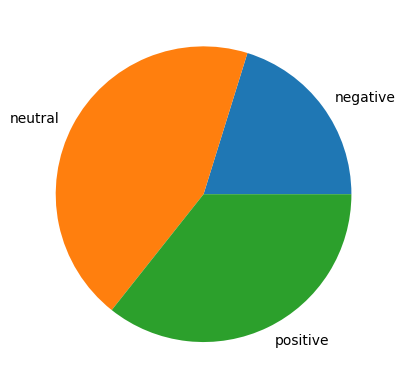

In [ ]:
unique_vals, counts = np.unique(y_encoded, return_counts=True)
dt = pd.DataFrame(zip(unique_vals, counts), columns=['Value', 'Count'])
print(dt)

items = dt['Count']

plt.pie(items, labels = encoder.inverse_transform(dt['Value']))
plt.show() 

In [ ]:
y_encoded

array([1, 0, 1, ..., 0, 0, 0], shape=(1772,))

In [ ]:
list(encoder.inverse_transform(np.unique(y_encoded)))

['negative', 'neutral', 'positive']

In [ ]:
X

0       rule no mete about polarizing political topic ...
2       no politics danger now i can make a propaganda...
3                             i am the senate get stabbed
4                                       is this a suicide
5                                                 removed
                              ...                        
1995                          god gen alpha need to chill
1996              people when new generation doe anything
1997                          me when minor inconvenience
1998    a a gen z who didn experience brain rot in wes...
1999    ah the vine era had a boatload of cringe quote...
Name: processedText, Length: 1772, dtype: object

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1, 2), max_df=0.9, min_df=5)

x_vect = vectorizer.fit_transform(dataset['processedText'])

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_vect, y_encoded, test_size=0.2, random_state=42)

In [ ]:
print(y.value_counts())

processedSentiment
neutral     782
positive    632
negative    358
Name: count, dtype: int64


In [ ]:
xtrain

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6120 stored elements and shape (1417, 565)>

In [ ]:
ytrain

array([1, 2, 1, ..., 0, 1, 2], shape=(1417,))

In [ ]:
model = MultinomialNB()

In [ ]:
model.fit(xtrain, ytrain)

MultinomialNB()

In [ ]:
ypred = model.predict(xtest)

In [ ]:
accuracy_score(ytest, ypred)

0.6422535211267606

In [ ]:
confusion_matrix(ytest, ypred)

array([[ 18,  37,  23],
       [  3, 143,  17],
       [  1,  46,  67]])

In [ ]:
caption = "This is not nice. I hate it."
caption_processed = preprocessText(caption)

caption_processed

'this is not nice i hate it'

In [ ]:
caption_processed_vect = vectorizer.transform([caption_processed])

caption_processed_vect

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (1, 565)>

In [ ]:
ypred = model.predict(caption_processed_vect)

ypred

array([0])

In [ ]:
list(encoder.inverse_transform(ypred))

['negative']

In [ ]:
! pip install joblib


[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'sentimentanalyze.pkl')

['sentimentanalyze.pkl']

In [ ]:
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [ ]:
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']